In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Agglomerative Clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
data= pd.read_csv('ilustrasi k means.csv', sep=';') 
x=data.copy()

In [8]:
x

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


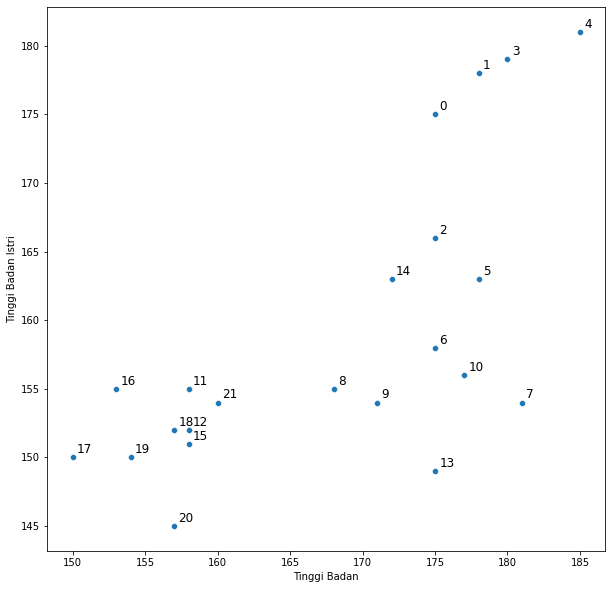

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan',
               y= 'tinggibadanistri',
               data=x)
plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(x.shape[0])):
    plt.annotate(txt, (x['tinggibadan'][i]+0.3, x['tinggibadanistri'][i]+0.3), fontsize=12)

## Dendogram

In [12]:
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

Text(0, 0.5, 'cluster distance')

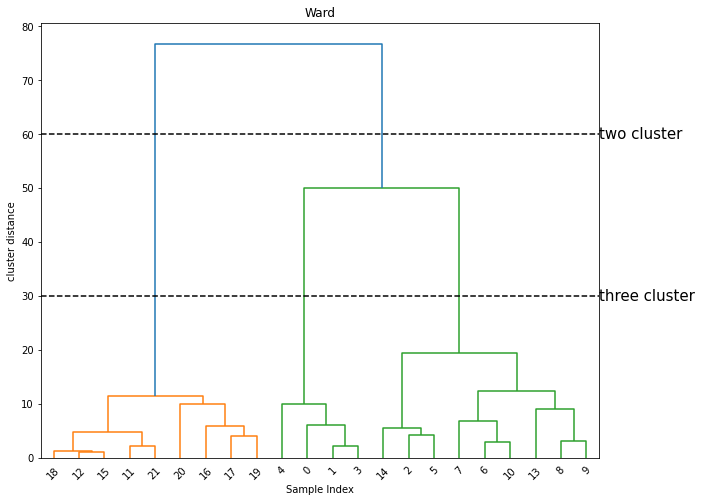

In [14]:
linkage_array=ward(x)

plt.figure(figsize=(10,8))
dendrogram(linkage_array,25) #25= truncade_mode, untuk condense dendrogram sehingga lebih mudah dibaca, 
# terutama kalau data point terlalu banyak 
ax=plt.gca()#Get the current Axes
bound=ax.get_xbound()

ax.plot(bound,[60,60],'--',c='k') #60 adalah posisi sumbu y di mana kluster =2
ax.plot(bound,[30,30],'--',c='k') #30 adalah posisi sumbu y di mana kluster =3

ax.text(bound[1],60, 'two cluster', va='center', fontdict={'size':15})
ax.text(bound[1],30, 'three cluster', va='center', fontdict={'size':15})

plt.title('Ward')
plt.xlabel('Sample Index')
plt.ylabel('cluster distance')

Text(0, 0.5, 'cluster distance')

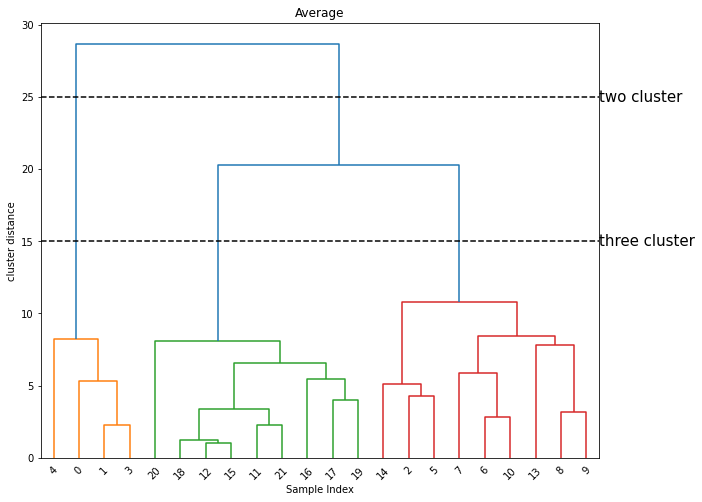

In [16]:
linkage_array=average(x)

plt.figure(figsize=(10,8))
dendrogram(linkage_array,25) #25= truncade_mode, untuk condense dendrogram sehingga lebih mudah dibaca, 
# terutama kalau data point terlalu banyak 
ax=plt.gca()#Get the current Axes
bound=ax.get_xbound()

ax.plot(bound,[25,25],'--',c='k') 
ax.plot(bound,[15,15],'--',c='k') 

ax.text(bound[1],25, 'two cluster', va='center', fontdict={'size':15})
ax.text(bound[1],15, 'three cluster', va='center', fontdict={'size':15})

plt.title('Average')
plt.xlabel('Sample Index')
plt.ylabel('cluster distance')

Text(0, 0.5, 'cluster distance')

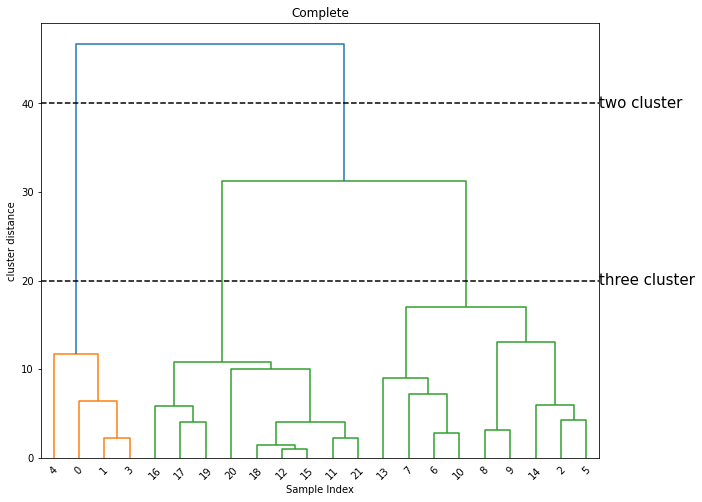

In [18]:
linkage_array=complete(x)

plt.figure(figsize=(10,8))
dendrogram(linkage_array,25) #25= truncade_mode, untuk condense dendrogram sehingga lebih mudah dibaca, 
# terutama kalau data point terlalu banyak 
ax=plt.gca()#Get the current Axes
bound=ax.get_xbound()

ax.plot(bound,[40,40],'--',c='k') 
ax.plot(bound,[20,20],'--',c='k') 

ax.text(bound[1],40, 'two cluster', va='center', fontdict={'size':15})
ax.text(bound[1],20, 'three cluster', va='center', fontdict={'size':15})

plt.title('Complete')
plt.xlabel('Sample Index')
plt.ylabel('cluster distance')

## Results Comparison

In [19]:
agg_ward=AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_average= AgglomerativeClustering(n_clusters=3, linkage='average')
agg_complete= AgglomerativeClustering(n_clusters=3, linkage='complete')

In [20]:
data['ward']=agg_ward.fit_predict(x)
data['average']= agg_average.fit_predict(x)
data['complete']=agg_complete.fit_predict(x)

In [22]:
data #nomor cluster berbeda karena pengacakkan, tapi terlihat bahwa ketiga metode menghasilkan cluster yang sama

,tinggibadan,tinggibadanistri,ward,average,complete
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


Text(0, 0.5, 'TInggi Badan Istri')

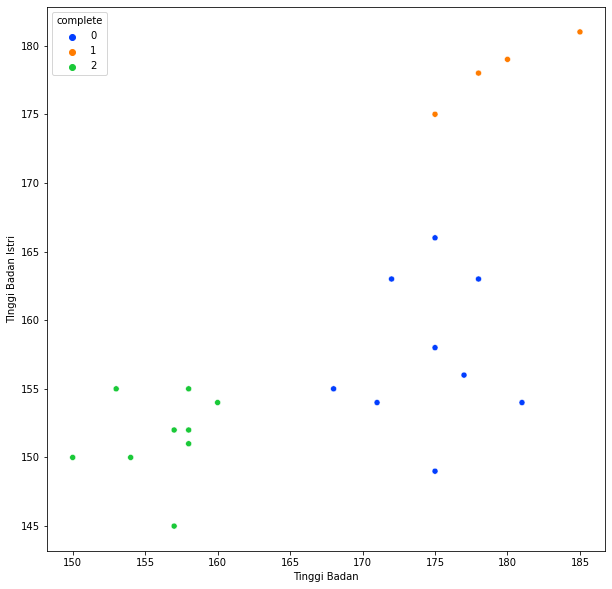

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan',y='tinggibadanistri', data=x, hue='complete', palette='bright')

plt.xlabel('Tinggi Badan')
plt.ylabel('TInggi Badan Istri')

# DBScan
density-based spatial clustering of applications with noise

In [26]:
data=pd.read_csv('ilustrasi k means.csv', sep=';')
x=data.copy()

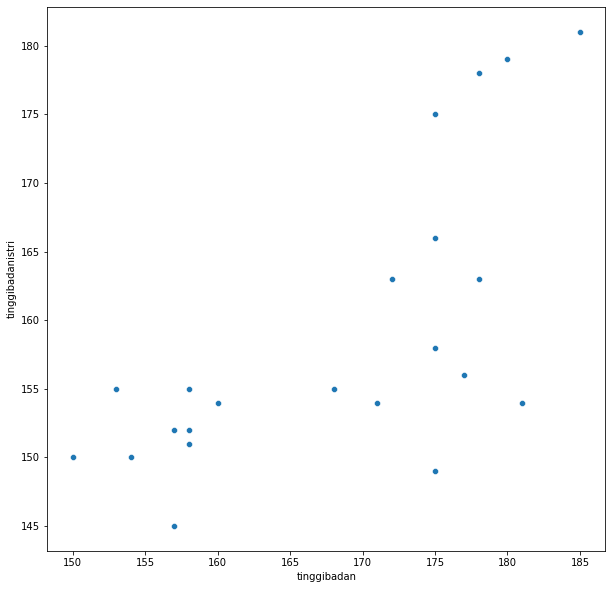

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=data)

## Clustering awal

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [30]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [33]:
dbscan=DBSCAN(eps=0.8, min_samples=6)
cluster=dbscan.fit_predict(x_scaled)

In [36]:
print(cluster) # hasilnya, technically ada 3 cluster, tapi -1 adalah noise, 
# jadi hasil clustering di atas adalah 2 cluster, dengan -1 tidak dihitung sebagi cluster 

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [37]:
silhouette_score(x_scaled,cluster)

0.6161772649616482

## Optimizing min_samples and eps

In [43]:
for eps in [i/10 for i in range(6,8)]:
    for min_samples in range(4,6):
        print(f'eps {eps}\nmin samples {min_samples}')
        
        dbscan=DBSCAN(eps=eps, min_samples=min_samples)
        labels=dbscan.fit_predict(x_scaled)
        score= silhouette_score(x_scaled,labels) #sil score butuh min 2 cluster
        
        print(f'cluster present: {np.unique(labels)}')
        print(f'cluster sizes: {np.bincount(labels+1)}')
        print(f'silhouette score: {score}\n')

eps 0.6
min samples 4
cluster present: [-1  0  1]
cluster sizes: [7 6 9]
silhouette score: 0.3901682187136734

eps 0.6
min samples 5
cluster present: [-1  0  1]
cluster sizes: [8 5 9]
silhouette score: 0.35497113213899967

eps 0.7
min samples 4
cluster present: [0 1 2]
cluster sizes: [0 4 9 9]
silhouette score: 0.6161772649616482

eps 0.7
min samples 5
cluster present: [-1  0  1]
cluster sizes: [4 9 9]
silhouette score: 0.6161772649616482



Parameter yang dipilih adalah eps:7 dan min_samples: 4, karena tidak ada sample yang dianggap noise (lebih mudah diintepretasikan pada pada kasus ini) dan memiliki silhouette score tertinggi.

## Final Result

In [46]:
dbscan= DBSCAN(eps=0.7, min_samples=4)
labels= dbscan.fit_predict(x_scaled)
data['cluster']=labels

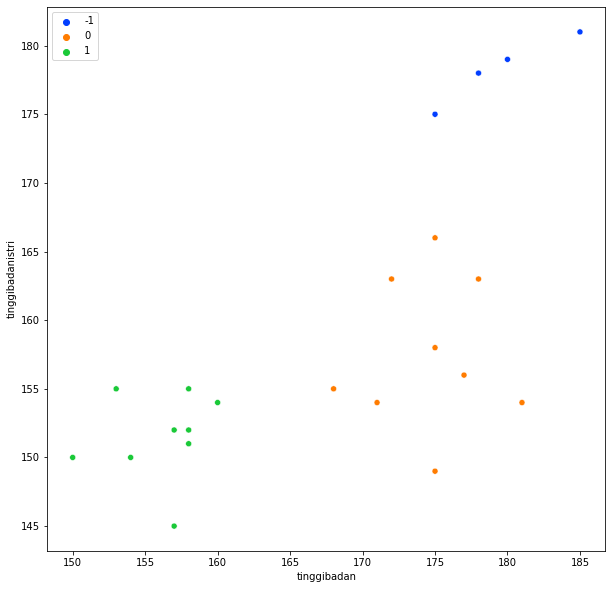

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=data, hue= cluster, palette='bright')

# Clustering 3 dimensi

In [50]:
df= pd.read_csv('Mall_Customers.csv')

In [51]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
df=df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'})

In [55]:
x=df.loc[:,['Age','Annual Income','Spending Score']]

In [56]:
from mpl_toolkits.mplot3d import axes3d

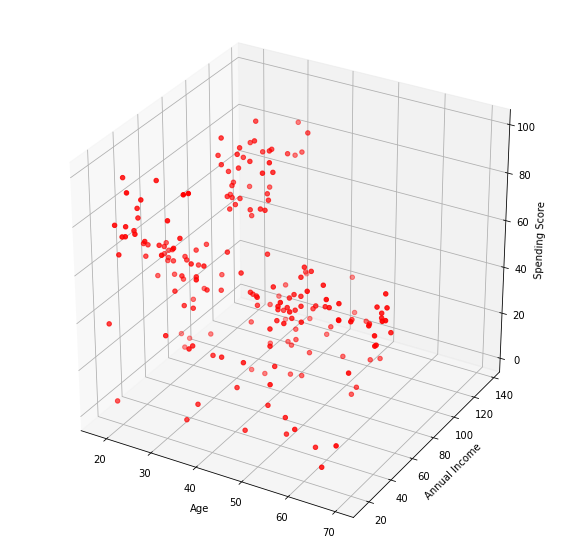

In [58]:
fig= plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')

X=x['Age']
Y=x['Annual Income']
Z=x['Spending Score']

ax.scatter(X,Y,Z, c='r', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()


In [59]:
from sklearn.cluster import KMeans

In [68]:
kmeans= KMeans(n_clusters=6,random_state=2020)
x['cluster']=kmeans.fit_predict(x)

In [69]:
x.head()

,Age,Annual Income,Spending Score,cluster
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5


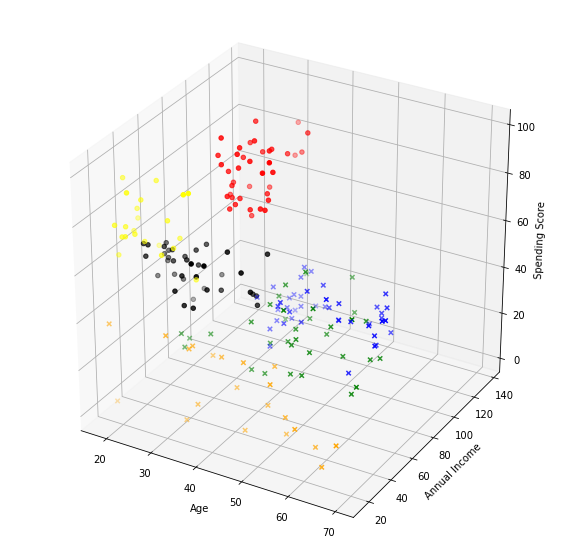

In [70]:
fig= plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')


ax.scatter(x['Age'][x['cluster']==0],x['Annual Income'][x['cluster']==0],x['Spending Score'][x['cluster']==0],c='r', marker='o')
ax.scatter(x['Age'][x['cluster']==1],x['Annual Income'][x['cluster']==1],x['Spending Score'][x['cluster']==1],c='b', marker='x')
ax.scatter(x['Age'][x['cluster']==2],x['Annual Income'][x['cluster']==2],x['Spending Score'][x['cluster']==2],c='yellow', marker='o')
ax.scatter(x['Age'][x['cluster']==3],x['Annual Income'][x['cluster']==3],x['Spending Score'][x['cluster']==3],c='g', marker='x')
ax.scatter(x['Age'][x['cluster']==4],x['Annual Income'][x['cluster']==4],x['Spending Score'][x['cluster']==4],c='k', marker='o')
ax.scatter(x['Age'][x['cluster']==5],x['Annual Income'][x['cluster']==5],x['Spending Score'][x['cluster']==5],c='orange', marker='x')
    
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

Tugas baca:
https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca